#Topic Modelling

##Importing Libraries

In [ ]:
#Basic text manipulation libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
import os
import numpy as np
import pandas as pd
import re
import spacy

import gensim
from gensim import corpora
nltk.download('omw-1.4')
nltk.download('wordnet')
from gensim import corpora
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##Function for analysing the apps

In [ ]:
def plot(data):
  sns.countplot(data['score'])
  plt.title('Count of the review ratings')
  plt.show()

## Function for Data Preprocessing



Preprocessing includes the following steps
1.Tokenization
2.Removing the stop words
3.Words smaller than length 3 are removed
4.Lemmetization
5.Stemming

In [ ]:
def lemmatize(text):
    return WordNetLemmatizer().lemmatize(text,pos='n')
   

#tokenize and lemmatize
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize(token))
    return result

In [ ]:
def preprocessing(data):
  processed_docs = []
  for doc in data['content']:
    processed_docs.append(preprocess(doc))
  return processed_docs


##Building an LDA model

In [ ]:
LDA = gensim.models.ldamodel.LdaModel

In [ ]:
def creating_lda_model(data):
  dictionary = corpora.Dictionary(preprocessing(data))
  doc_term_matrix = [dictionary.doc2bow(doc) for doc in preprocessing(data)]
  lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,chunksize=1000, passes=50)
  return lda_model

In [ ]:
def printing_topics(data):
  for idx,topic in creating_lda_model(data).print_topics(-1,num_words=10):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

#Topic_Modelling_Apps

##APP-1  

In [ ]:
app1data= pd.read_excel('/content/ABC Kids.xlsx')
app1data_bad_reviews= app1data.loc[app1data.score==1]
printing_topics(app1data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.021*"writing" + 0.021*"like" + 0.021*"good" + 0.021*"english" + 0.021*"people" + 0.021*"perfect" + 0.021*"pronunciation" + 0.021*"letter" + 0.011*"need" + 0.011*"update"


Topic: 1 
Words: 0.049*"phonetics" + 0.037*"letter" + 0.025*"sound" + 0.025*"teach" + 0.025*"teacher" + 0.014*"properly" + 0.014*"teaching" + 0.014*"learn" + 0.014*"method" + 0.014*"worked"


Topic: 2 
Words: 0.037*"apps" + 0.030*"working" + 0.023*"play" + 0.016*"game" + 0.016*"permission" + 0.016*"open" + 0.016*"install" + 0.016*"time" + 0.016*"tablet" + 0.016*"possible"


Topic: 3 
Words: 0.045*"letter" + 0.026*"game" + 0.026*"sound" + 0.020*"child" + 0.014*"want" + 0.014*"offspring" + 0.014*"subscription" + 0.014*"cancel" + 0.014*"case" + 0.014*"year"


Topic: 4 
Words: 0.032*"letter" + 0.032*"sound" + 0.020*"select" + 0.020*"setting" + 0.013*"issue" + 0.013*"load" + 0.013*"tracing" + 0.013*"option" + 0.013*"pronounce" + 0.013*"checked"


Topic: 5 
Words: 0.030*"version" + 0.021*"working" + 0.02



*   Topic-1   Phone Version not available for all settings
*  Topic-2   Teachers misspelling the words
*   Topic-3   More time taking for downloading
*   Topic-4  Perfect English, Very Helpful
*   Topic-5  Issue occuring while animation writing.
*  Topic-6 Wants even better characters
*  Topic-7 Problem in animation button







/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


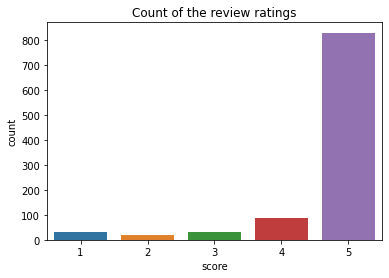

In [ ]:
plot(app1data)

##APP2 

In [ ]:
app2data= pd.read_excel('/content/ABCmouse (1).xlsx')
app2data_bad_reviews= app2data.loc[app2data.score==1]
printing_topics(app2data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.020*"issue" + 0.012*"phone" + 0.012*"stuck" + 0.012*"child" + 0.011*"learning" + 0.011*"work" + 0.010*"activity" + 0.009*"load" + 0.009*"screen" + 0.008*"tried"


Topic: 1 
Words: 0.019*"time" + 0.019*"work" + 0.015*"year" + 0.014*"phone" + 0.012*"download" + 0.010*"subscription" + 0.010*"screen" + 0.009*"tried" + 0.009*"freeze" + 0.009*"like"


Topic: 2 
Words: 0.022*"subscription" + 0.016*"year" + 0.015*"cancel" + 0.014*"money" + 0.010*"load" + 0.009*"learning" + 0.008*"disappointed" + 0.008*"mouse" + 0.007*"experience" + 0.007*"service"


Topic: 3 
Words: 0.024*"load" + 0.015*"cancel" + 0.015*"time" + 0.015*"device" + 0.014*"year" + 0.010*"subscription" + 0.010*"slow" + 0.010*"great" + 0.009*"take" + 0.009*"activity"


Topic: 4 
Words: 0.022*"month" + 0.021*"subscription" + 0.019*"account" + 0.018*"charged" + 0.017*"cancel" + 0.015*"service" + 0.014*"free" + 0.013*"card" + 0.011*"charge" + 0.010*"money"


Topic: 5 
Words: 0.022*"cancel" + 0.017*"time" + 0.016*"sub

*   Topic-1   Screen freezing in the middle
*  Topic-2   Slow Loading
*   Topic-3   Charged for one month free trial also
*   Topic-4  Pointer like mouse is annoying
*   Topic-5  Subscription issues
*   Topc-6  Login issues
*   Topic-7  Payment related issue

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


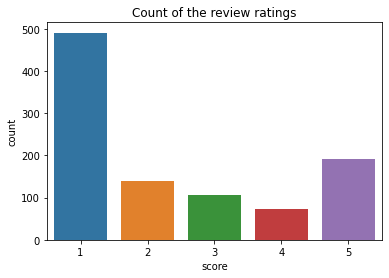

In [ ]:
plot(app2data)

##APP3

In [ ]:
app3data= pd.read_excel('/content/BYJUS (1).xlsx')
app3data_bad_reviews= app3data.loc[app3data.score==2]
printing_topics(app3data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.039*"video" + 0.026*"good" + 0.022*"course" + 0.018*"problem" + 0.018*"watch" + 0.018*"class" + 0.013*"issue" + 0.013*"english" + 0.013*"teacher" + 0.013*"byjus"


Topic: 1 
Words: 0.034*"working" + 0.024*"update" + 0.020*"time" + 0.015*"byju" + 0.015*"properly" + 0.015*"vedio" + 0.015*"good" + 0.010*"tried" + 0.010*"reason" + 0.010*"issue"


Topic: 2 
Words: 0.025*"problem" + 0.022*"want" + 0.022*"good" + 0.018*"video" + 0.015*"change" + 0.015*"screen" + 0.015*"game" + 0.011*"star" + 0.011*"skip" + 0.011*"option"


Topic: 3 
Words: 0.043*"video" + 0.022*"topic" + 0.019*"class" + 0.017*"byjus" + 0.017*"good" + 0.014*"show" + 0.011*"network" + 0.011*"error" + 0.011*"start" + 0.011*"problem"


Topic: 4 
Words: 0.059*"video" + 0.030*"update" + 0.026*"question" + 0.015*"time" + 0.015*"help" + 0.011*"concept" + 0.011*"issue" + 0.011*"problem" + 0.011*"element" + 0.011*"come"


Topic: 5 
Words: 0.026*"issue" + 0.026*"class" + 0.020*"byjus" + 0.020*"talking" + 0.013*"callin

*   Topic-1  Starting Problem
*  Topic-2   Problem coming in the middle of vedio
*  Topic-3  Extra content more than subject 
*  Topic-4  Issue when reciecving a call
*  Topic-5  Blank Screen after updating
*  Topic-6 Issues regarding calling and talking
*  Topic-7  Access issues


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


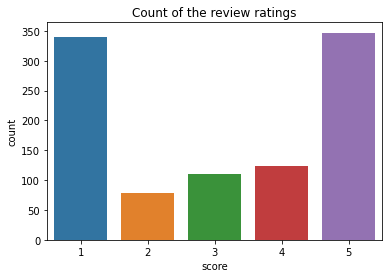

In [ ]:
plot(app3data)

##APP4

In [ ]:
app4data= pd.read_excel('/content/Brainly.xlsx')
app4data_bad_reviews= app4data.loc[app4data.score==1]
printing_topics(app4data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.022*"open" + 0.021*"like" + 0.017*"opening" + 0.015*"problem" + 0.014*"answer" + 0.014*"country" + 0.013*"working" + 0.012*"tried" + 0.011*"brainly" + 0.011*"need"


Topic: 1 
Words: 0.049*"problem" + 0.047*"connection" + 0.032*"like" + 0.028*"work" + 0.026*"say" + 0.023*"fine" + 0.021*"internet" + 0.018*"answer" + 0.014*"keep" + 0.014*"saying"


Topic: 2 
Words: 0.019*"work" + 0.019*"question" + 0.012*"download" + 0.012*"good" + 0.012*"help" + 0.012*"tried" + 0.012*"asking" + 0.008*"account" + 0.008*"open" + 0.008*"thing"


Topic: 3 
Words: 0.039*"question" + 0.038*"answer" + 0.011*"problem" + 0.011*"scan" + 0.010*"update" + 0.009*"wrong" + 0.008*"need" + 0.008*"like" + 0.008*"work" + 0.008*"experience"


Topic: 4 
Words: 0.083*"answer" + 0.036*"question" + 0.025*"time" + 0.016*"problem" + 0.012*"people" + 0.012*"wrong" + 0.012*"star" + 0.011*"good" + 0.011*"brainly" + 0.010*"want"


Topic: 5 
Words: 0.063*"question" + 0.021*"class" + 0.020*"like" + 0.016*"show" + 0

*  Topic-1  Starting Problem
*  Topic-2  Connection Problem
*  Topic-3  Downloading issue
*  Topic-4  Scanning problem during question answering
*  Topic-5 Ranking issues
*  Topic-6 Problem in the question asked
*  Topic-7 Aking for the subscription money

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


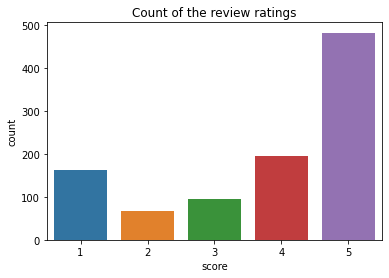

In [ ]:
plot(app4data)

##APP5

In [ ]:
app5data= pd.read_excel('/content/Coursera (1).xlsx')
app5data_bad_reviews= app5data.loc[app5data.score==1]
printing_topics(app5data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.012*"website" + 0.012*"course" + 0.012*"issue" + 0.010*"support" + 0.010*"time" + 0.007*"tried" + 0.006*"error" + 0.006*"mode" + 0.006*"good" + 0.005*"phone"


Topic: 1 
Words: 0.044*"course" + 0.024*"video" + 0.019*"load" + 0.015*"crash" + 0.013*"time" + 0.013*"good" + 0.012*"connection" + 0.012*"internet" + 0.010*"coursera" + 0.010*"work"


Topic: 2 
Words: 0.040*"course" + 0.015*"support" + 0.012*"coursera" + 0.010*"screen" + 0.009*"experience" + 0.009*"access" + 0.008*"service" + 0.008*"customer" + 0.008*"worst" + 0.008*"video"


Topic: 3 
Words: 0.039*"video" + 0.020*"course" + 0.015*"internet" + 0.013*"screen" + 0.011*"connection" + 0.011*"assignment" + 0.009*"download" + 0.008*"coursera" + 0.008*"account" + 0.008*"time"


Topic: 4 
Words: 0.034*"course" + 0.016*"coursera" + 0.013*"time" + 0.012*"work" + 0.011*"video" + 0.010*"certificate" + 0.009*"refund" + 0.008*"phone" + 0.008*"update" + 0.007*"subscription"


Topic: 5 
Words: 0.020*"course" + 0.018*"time" +

*  Topic-1  Poor quality of vedios
*  Topic-2 Internet connection issues
*  Topic-3 More Time taking for downloading
*  Topic-4 eMail recieving issues
*  Topic-5  Poor quality certificate
*  Topic-6 Time taking for recieving the certificate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


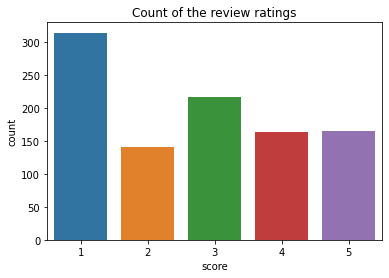

In [ ]:
plot(app5data)

##APP6

In [ ]:
app6data= pd.read_excel('/content/Diksha (1).xlsx')
app6data_bad_reviews= app6data.loc[app6data.score==1]
printing_topics(app6data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.033*"video" + 0.024*"login" + 0.016*"tried" + 0.015*"course" + 0.014*"time" + 0.012*"teacher" + 0.012*"open" + 0.011*"password" + 0.010*"state" + 0.010*"worst"


Topic: 1 
Words: 0.064*"course" + 0.047*"certificate" + 0.033*"completed" + 0.025*"download" + 0.020*"show" + 0.015*"problem" + 0.012*"completion" + 0.011*"issue" + 0.009*"complete" + 0.008*"training"


Topic: 2 
Words: 0.035*"time" + 0.014*"module" + 0.013*"open" + 0.013*"worst" + 0.012*"option" + 0.011*"problem" + 0.010*"properly" + 0.009*"issue" + 0.009*"working" + 0.009*"take"


Topic: 3 
Words: 0.034*"course" + 0.025*"time" + 0.024*"page" + 0.018*"open" + 0.015*"start" + 0.015*"work" + 0.014*"application" + 0.014*"login" + 0.013*"properly" + 0.013*"update"


Topic: 4 
Words: 0.026*"course" + 0.021*"problem" + 0.017*"showing" + 0.016*"time" + 0.015*"completed" + 0.015*"content" + 0.012*"certificate" + 0.010*"worst" + 0.010*"user" + 0.009*"available"


Topic: 5 
Words: 0.029*"content" + 0.029*"training" +

*  Topic-1  Login Issues
*  Topic-2  Certificate Downlading problem
*  Topic-3  Time taking for module loading
*  Topic-4   Problem  in showing the amount of content completed
*  Topic-5  Server Issues


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


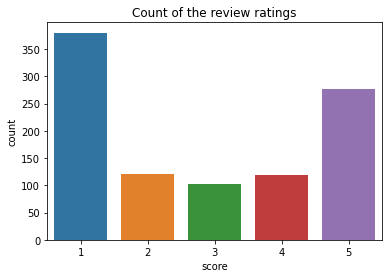

In [ ]:
plot(app6data)

##APP7

In [ ]:
app7data= pd.read_excel('/content/DoubtNut.xlsx')
app7data_bad_reviews= app7data.loc[app7data.score==1]
printing_topics(app7data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.021*"phone" + 0.013*"time" + 0.012*"show" + 0.012*"notification" + 0.010*"internet" + 0.010*"working" + 0.009*"option" + 0.009*"load" + 0.008*"star" + 0.008*"page"


Topic: 1 
Words: 0.029*"solution" + 0.022*"question" + 0.019*"good" + 0.018*"time" + 0.018*"video" + 0.014*"worst" + 0.013*"notification" + 0.012*"like" + 0.011*"class" + 0.011*"problem"


Topic: 2 
Words: 0.028*"problem" + 0.027*"question" + 0.019*"doubt" + 0.017*"doubtnut" + 0.016*"answer" + 0.011*"worst" + 0.011*"student" + 0.011*"language" + 0.010*"good" + 0.010*"course"


Topic: 3 
Words: 0.036*"time" + 0.023*"video" + 0.012*"answer" + 0.012*"student" + 0.012*"notification" + 0.012*"showing" + 0.012*"wrong" + 0.011*"loading" + 0.011*"went" + 0.009*"question"


Topic: 4 
Words: 0.055*"question" + 0.031*"answer" + 0.016*"solution" + 0.013*"time" + 0.011*"search" + 0.011*"option" + 0.011*"like" + 0.011*"video" + 0.009*"study" + 0.009*"properly"


Topic: 5 
Words: 0.036*"solution" + 0.029*"video" + 0.02

*  Topic-1  Loading Notificartion issues
*  Topic-2  Showing more notifications
*  Topic-3  No language option
*  Topic-4  Giving notification for the some problem solved a long ago
*  Topic-5  Searching time more
*   Topic-6  Vedio Solutions only present, not text solutions
*  Topic-7  No proper solution suggestions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


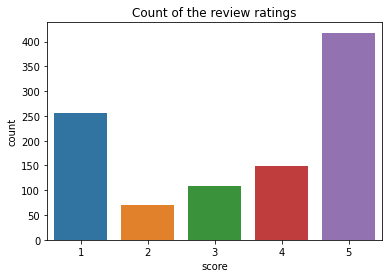

In [ ]:
plot(app7data)

##APP8

In [ ]:
app8data= pd.read_excel('/content/Duolingo.xlsx')
app8data_bad_reviews= app8data.loc[app8data.score==1]
printing_topics(app8data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.017*"freeze" + 0.017*"streak" + 0.011*"great" + 0.011*"money" + 0.011*"duolingo" + 0.011*"exercise" + 0.011*"wrong" + 0.011*"completely" + 0.011*"broken" + 0.011*"learning"


Topic: 1 
Words: 0.023*"time" + 0.018*"heart" + 0.018*"language" + 0.018*"learning" + 0.015*"lesson" + 0.015*"update" + 0.010*"star" + 0.010*"wrong" + 0.008*"slow" + 0.008*"spanish"


Topic: 2 
Words: 0.020*"mistake" + 0.013*"duolingo" + 0.013*"learning" + 0.013*"error" + 0.013*"number" + 0.013*"model" + 0.013*"deleting" + 0.007*"subscription" + 0.007*"start" + 0.007*"level"


Topic: 3 
Words: 0.021*"language" + 0.018*"learning" + 0.018*"mistake" + 0.014*"correct" + 0.011*"great" + 0.011*"offline" + 0.011*"time" + 0.007*"making" + 0.007*"instead" + 0.007*"typo"


Topic: 4 
Words: 0.020*"learning" + 0.011*"making" + 0.011*"sentence" + 0.011*"language" + 0.011*"button" + 0.011*"life" + 0.011*"mistake" + 0.011*"word" + 0.006*"having" + 0.006*"annoying"


Topic: 5 
Words: 0.039*"word" + 0.015*"learn

*  Topic-1  Screen Freezing
*  Topic-2  Unable to find spanish Language
*  Topic-3  Payment deleted issues
*  Topic-4  Correcting mistakes well
*  Topic-5   Mistake in making words form sentences
*  Topic-6  Good practice along with learning

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


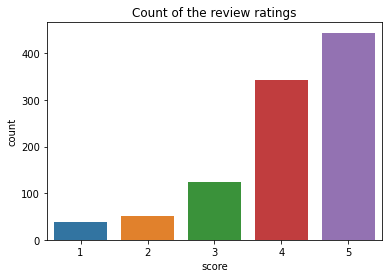

In [ ]:
plot(app8data)

##APP9

In [ ]:
app9data= pd.read_excel('/content/EMBIBE.xlsx')
app9data_bad_reviews= app9data.loc[app9data.score==1]
printing_topics(app9data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.016*"class" + 0.016*"worst" + 0.016*"sign" + 0.016*"change" + 0.011*"phone" + 0.011*"science" + 0.011*"good" + 0.011*"want" + 0.011*"content" + 0.011*"study"


Topic: 1 
Words: 0.040*"download" + 0.040*"waste" + 0.027*"time" + 0.021*"test" + 0.021*"like" + 0.014*"worst" + 0.014*"bug" + 0.014*"completed" + 0.014*"useless" + 0.008*"class"


Topic: 2 
Words: 0.021*"sign" + 0.021*"trying" + 0.021*"hate" + 0.014*"like" + 0.014*"problem" + 0.014*"minute" + 0.014*"unable" + 0.014*"data" + 0.014*"book" + 0.014*"take"


Topic: 3 
Words: 0.037*"english" + 0.037*"hindi" + 0.030*"language" + 0.023*"work" + 0.019*"tried" + 0.015*"learning" + 0.015*"login" + 0.015*"science" + 0.015*"subject" + 0.015*"remain"


Topic: 4 
Words: 0.035*"time" + 0.022*"showing" + 0.018*"question" + 0.018*"password" + 0.016*"tried" + 0.013*"test" + 0.013*"working" + 0.013*"install" + 0.013*"number" + 0.013*"character"


Topic: 5 
Words: 0.025*"sign" + 0.019*"access" + 0.013*"student" + 0.013*"working" 

*  Topic-1  Less study content
*  Topic-2   Felt Useless due to bugs
*  Topic-3  Less time for problem solving
*  Topic-4   All learning subjects like science not available
*  Topic-5  Number of characters in password issue
*  Topic-6  Vedio lagging issues


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


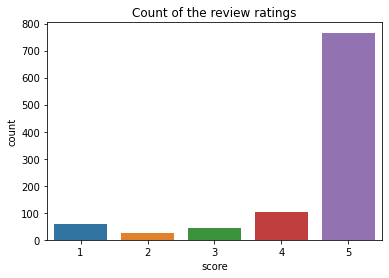

In [ ]:
plot(app9data)

##APP10

In [ ]:
app10data= pd.read_excel('/content/Eduauraa.xlsx')
app10data_bad_reviews= app10data.loc[app10data.score==1]
printing_topics(app10data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.033*"subscription" + 0.030*"waste" + 0.023*"download" + 0.020*"time" + 0.020*"star" + 0.017*"data" + 0.017*"education" + 0.014*"register" + 0.014*"class" + 0.014*"video"


Topic: 1 
Words: 0.044*"worst" + 0.030*"money" + 0.025*"study" + 0.020*"video" + 0.015*"time" + 0.015*"education" + 0.015*"subscription" + 0.010*"number" + 0.010*"wrong" + 0.010*"good"


Topic: 2 
Words: 0.027*"application" + 0.022*"experience" + 0.022*"money" + 0.021*"worst" + 0.016*"like" + 0.016*"day" + 0.016*"free" + 0.011*"thing" + 0.011*"option" + 0.011*"math"


Topic: 3 
Words: 0.029*"register" + 0.022*"free" + 0.022*"content" + 0.022*"able" + 0.015*"education" + 0.015*"fake" + 0.015*"think" + 0.015*"company" + 0.015*"poor" + 0.015*"people"


Topic: 4 
Words: 0.077*"class" + 0.026*"open" + 0.026*"student" + 0.026*"medium" + 0.020*"change" + 0.020*"hindi" + 0.014*"install" + 0.014*"dont" + 0.014*"free" + 0.014*"high"


Topic: 5 
Words: 0.027*"time" + 0.018*"install" + 0.018*"class" + 0.018*"g

*   Topic-1  Waste of Subscription money
*  Topic-2   Time taking for vedio 
*  Topic-3   Content available without registration also
*  Topic-4  Felt Fake
*  Topic-5  Good Vedio 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


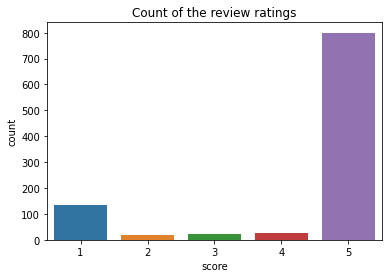

In [ ]:
plot(app10data)

##APP11

In [ ]:
app11data= pd.read_excel('/content/Epic (1).xlsx')
app11data_bad_reviews= app11data.loc[app11data.score==1]
printing_topics(app11data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.025*"subscription" + 0.019*"tried" + 0.016*"epic" + 0.016*"cancel" + 0.015*"account" + 0.015*"membership" + 0.013*"paid" + 0.011*"service" + 0.010*"email" + 0.010*"school"


Topic: 1 
Words: 0.057*"book" + 0.032*"read" + 0.016*"time" + 0.015*"free" + 0.013*"like" + 0.012*"account" + 0.011*"work" + 0.011*"want" + 0.008*"sign" + 0.008*"month"


Topic: 2 
Words: 0.023*"account" + 0.023*"time" + 0.020*"email" + 0.017*"reading" + 0.011*"book" + 0.011*"kid" + 0.011*"tried" + 0.010*"epic" + 0.009*"school" + 0.008*"level"


Topic: 3 
Words: 0.029*"epic" + 0.017*"read" + 0.017*"subscription" + 0.014*"unlimited" + 0.012*"account" + 0.012*"access" + 0.012*"page" + 0.011*"need" + 0.010*"month" + 0.010*"support"


Topic: 4 
Words: 0.055*"book" + 0.029*"read" + 0.014*"epic" + 0.012*"time" + 0.011*"kid" + 0.011*"membership" + 0.011*"parent" + 0.010*"thing" + 0.009*"reading" + 0.008*"page"


Topic: 5 
Words: 0.028*"cancel" + 0.026*"subscription" + 0.022*"service" + 0.021*"customer" 

*  Topic-1   Payment related issues
*  Topic-2   More free time
*  Topic-3  Login related issue
*  Topic-4 Freely available but did payment 
*  Topic-5 Unlimited access
*  Topic-6  Amount paid for trail period also

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


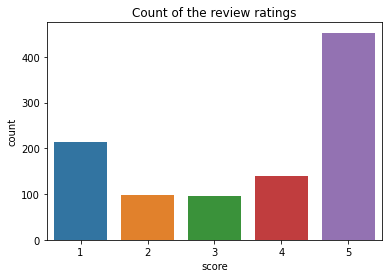

In [ ]:
plot(app11data)

##APP12

In [ ]:
app12data= pd.read_excel('/content/ExtraMarks (1).xlsx')
app12data_bad_reviews= app12data.loc[app12data.score==1]
printing_topics(app12data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.021*"class" + 0.016*"waste" + 0.014*"problem" + 0.012*"learning" + 0.009*"experience" + 0.009*"board" + 0.009*"say" + 0.009*"tried" + 0.007*"fraud" + 0.007*"said"


Topic: 1 
Words: 0.028*"worst" + 0.025*"time" + 0.021*"password" + 0.018*"open" + 0.012*"show" + 0.012*"question" + 0.009*"number" + 0.009*"subscription" + 0.009*"attempted" + 0.009*"install"


Topic: 2 
Words: 0.020*"properly" + 0.020*"problem" + 0.013*"answer" + 0.013*"help" + 0.013*"need" + 0.013*"speed" + 0.012*"screen" + 0.009*"password" + 0.009*"wrong" + 0.009*"application"


Topic: 3 
Words: 0.032*"time" + 0.023*"good" + 0.020*"content" + 0.015*"issue" + 0.012*"want" + 0.012*"video" + 0.010*"properly" + 0.009*"working" + 0.009*"version" + 0.009*"understand"


Topic: 4 
Words: 0.027*"time" + 0.018*"click" + 0.018*"worst" + 0.014*"class" + 0.014*"slide" + 0.010*"problem" + 0.010*"work" + 0.010*"school" + 0.010*"money" + 0.009*"want"


Topic: 5 
Words: 0.034*"login" + 0.029*"showing" + 0.018*"time" + 

* Topic-1   Trust realted issues, Felt Fraud
*  Topic-2  Attempted install
* Topic-3 Speed less between webpages
* Topic-4  Want vedio content more 
* Topic-5  Problem in presenting slides
* Topic-6  Showing correct password even when wrong password is entered 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


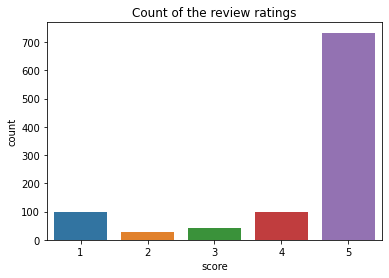

In [ ]:
plot(app12data)

##APP13

In [ ]:
app13data= pd.read_excel('/content/GreatLearning.xlsx')
app13data_bad_reviews= app13data.loc[app13data.score==1]
printing_topics(app13data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.035*"video" + 0.021*"sign" + 0.012*"work" + 0.011*"good" + 0.009*"option" + 0.009*"review" + 0.009*"experience" + 0.009*"number" + 0.009*"phone" + 0.009*"unable"


Topic: 1 
Words: 0.029*"time" + 0.027*"open" + 0.021*"login" + 0.012*"course" + 0.012*"slow" + 0.012*"content" + 0.012*"experience" + 0.012*"working" + 0.009*"download" + 0.009*"properly"


Topic: 2 
Words: 0.042*"course" + 0.025*"free" + 0.017*"update" + 0.015*"time" + 0.011*"learning" + 0.011*"working" + 0.011*"class" + 0.011*"good" + 0.009*"user" + 0.009*"take"


Topic: 3 
Words: 0.044*"course" + 0.017*"video" + 0.014*"time" + 0.011*"login" + 0.011*"worst" + 0.011*"option" + 0.010*"account" + 0.009*"star" + 0.009*"available" + 0.009*"offline"


Topic: 4 
Words: 0.023*"time" + 0.023*"video" + 0.019*"working" + 0.019*"notification" + 0.014*"stop" + 0.014*"course" + 0.010*"taking" + 0.010*"issue" + 0.010*"quiz" + 0.010*"lecture"


Topic: 5 
Words: 0.027*"login" + 0.025*"email" + 0.023*"account" + 0.018*"ap

* Topic-1  Unable to review
* Topic-2  Logging in slow
* Topic-3  Updated free course 
* Topic-4 Available offline
* Topic-5  Issue while taking quiz
* Topic-6  Dowloading certificate issue


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


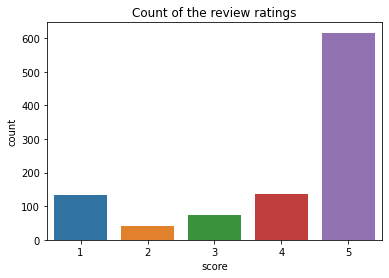

In [ ]:
plot(app13data)

##APP14

In [ ]:
app14data= pd.read_excel('/content/KhanAcademy.xlsx')
app14data_bad_reviews= app14data.loc[app14data.score==1]
printing_topics(app14data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.030*"wrong" + 0.015*"time" + 0.015*"account" + 0.015*"learning" + 0.015*"test" + 0.012*"website" + 0.012*"minute" + 0.012*"question" + 0.012*"answer" + 0.012*"khan"


Topic: 1 
Words: 0.018*"error" + 0.013*"website" + 0.013*"love" + 0.013*"work" + 0.013*"lesson" + 0.013*"actually" + 0.013*"making" + 0.013*"progress" + 0.013*"task" + 0.010*"load"


Topic: 2 
Words: 0.031*"video" + 0.016*"crash" + 0.014*"open" + 0.014*"time" + 0.012*"search" + 0.012*"khan" + 0.012*"academy" + 0.010*"able" + 0.010*"home" + 0.008*"download"


Topic: 3 
Words: 0.022*"open" + 0.019*"time" + 0.019*"able" + 0.016*"phone" + 0.016*"work" + 0.013*"tried" + 0.013*"great" + 0.013*"progress" + 0.010*"update" + 0.010*"question"


Topic: 4 
Words: 0.018*"video" + 0.015*"test" + 0.012*"screen" + 0.012*"star" + 0.012*"question" + 0.012*"course" + 0.012*"watch" + 0.012*"khan" + 0.012*"academy" + 0.009*"update"


Topic: 5 
Words: 0.024*"time" + 0.021*"video" + 0.019*"answer" + 0.014*"tried" + 0.014*"wou

* Topic-1  Suggeting to test before learning
* Topic-2  Error in loading task
* Topic-3  Vedio Crashing
* Topic-4  Need calssification of topics more
* Topic-5 Zooming problem
* Topic-6  Connection problem
* Topic-7  Couldn't star vedio in phone

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


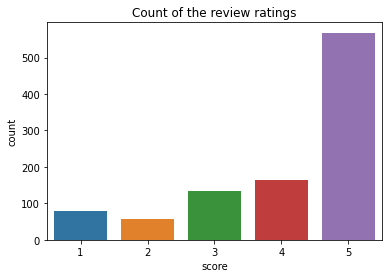

In [ ]:
plot(app14data)

##APP15

In [ ]:
app15data= pd.read_excel('/content/KhanKids.xlsx')
app15data_bad_reviews= app15data.loc[app15data.score==1]
printing_topics(app15data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.019*"screen" + 0.019*"year" + 0.019*"swipe" + 0.019*"daughter" + 0.013*"android" + 0.013*"click" + 0.013*"time" + 0.013*"love" + 0.013*"activity" + 0.013*"selected"


Topic: 1 
Words: 0.037*"email" + 0.025*"game" + 0.025*"available" + 0.013*"tablet" + 0.013*"keep" + 0.013*"love" + 0.013*"kid" + 0.013*"phone" + 0.013*"multiple" + 0.013*"uninstalled"


Topic: 2 
Words: 0.023*"reset" + 0.023*"email" + 0.016*"update" + 0.016*"work" + 0.016*"option" + 0.016*"working" + 0.016*"turned" + 0.016*"reinstalling" + 0.008*"unable" + 0.008*"automatically"


Topic: 3 
Words: 0.024*"password" + 0.024*"internet" + 0.024*"frozen" + 0.024*"reset" + 0.013*"crashed" + 0.013*"great" + 0.013*"apps" + 0.013*"samsung" + 0.013*"uninstall" + 0.013*"problem"


Topic: 4 
Words: 0.028*"getting" + 0.028*"email" + 0.028*"good" + 0.028*"receive" + 0.015*"samsung" + 0.015*"disappointed" + 0.015*"different" + 0.015*"password" + 0.015*"like" + 0.015*"device"


Topic: 5 
Words: 0.021*"crash" + 0.021*"lo

*  Topic-1  Time taking to swipe screen
* Topic-2  Many simliar apps available
* Topic-3 eMail update option unavailable after updating
* Topic-4  Frozen Screen , On reset crashed
* Topic-5 Unavailable to get password recovery mail for Samsung phones
* Topic-6 Crashing during loading



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


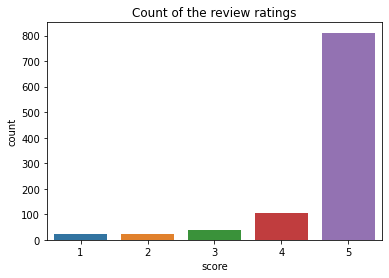

In [ ]:
plot(app15data)

##APP16

In [ ]:
app16data= pd.read_excel('/content/Kutuki (1).xlsx')
app16data_bad_reviews= app16data.loc[app16data.score==1]
printing_topics(app16data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.032*"hindi" + 0.032*"marathi" + 0.032*"tamil" + 0.032*"kid" + 0.032*"english" + 0.032*"telugu" + 0.017*"working" + 0.017*"language" + 0.017*"showing" + 0.017*"need"


Topic: 1 
Words: 0.042*"game" + 0.028*"hindi" + 0.028*"want" + 0.028*"tried" + 0.028*"english" + 0.028*"kid" + 0.028*"time" + 0.015*"change" + 0.015*"baby" + 0.015*"year"


Topic: 2 
Words: 0.043*"marathi" + 0.023*"open" + 0.023*"gave" + 0.023*"kutuki" + 0.023*"language" + 0.023*"wasted" + 0.023*"thinking" + 0.023*"type" + 0.023*"ebst" + 0.023*"chosen"


Topic: 3 
Words: 0.032*"like" + 0.032*"open" + 0.022*"able" + 0.022*"worst" + 0.022*"child" + 0.022*"class" + 0.022*"getting" + 0.022*"report" + 0.022*"scare" + 0.022*"check"


Topic: 4 
Words: 0.028*"learn" + 0.028*"time" + 0.028*"apps" + 0.028*"free" + 0.028*"purchase" + 0.028*"child" + 0.015*"open" + 0.015*"download" + 0.015*"unable" + 0.015*"available"


Topic: 5 
Words: 0.022*"point" + 0.022*"like" + 0.022*"number" + 0.022*"know" + 0.022*"install" 

* Topic-1  Language Problem
* Topic-2 Not able to change baby year
* Topic-3 Chosing language option not present
* Topic-4 Not getting report of kid
* Topic-5 Unable to download app freely 
* Topic-6 Financial error
* Topic-7 Feedback sending issue 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


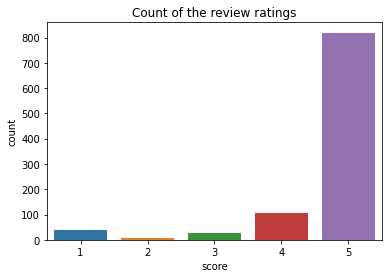

In [ ]:
plot(app16data)

##APP17

In [ ]:
app17data= pd.read_excel('/content/MathKids (1).xlsx')
app17data_bad_reviews= app17data.loc[app17data.score==1]
printing_topics(app17data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.049*"easy" + 0.037*"star" + 0.025*"math" + 0.025*"mean" + 0.025*"english" + 0.013*"designed" + 0.013*"hard" + 0.013*"child" + 0.013*"change" + 0.013*"addition"


Topic: 1 
Words: 0.031*"setting" + 0.016*"pronunciation" + 0.016*"english" + 0.016*"voice" + 0.016*"phone" + 0.016*"question" + 0.016*"alot" + 0.016*"better" + 0.016*"screen" + 0.016*"reinstalling"


Topic: 2 
Words: 0.041*"answer" + 0.041*"math" + 0.041*"verry" + 0.028*"kid" + 0.028*"need" + 0.028*"problem" + 0.028*"good" + 0.028*"like" + 0.015*"word" + 0.015*"going"


Topic: 3 
Words: 0.047*"game" + 0.029*"want" + 0.020*"play" + 0.020*"download" + 0.020*"language" + 0.020*"telling" + 0.020*"brother" + 0.020*"making" + 0.020*"know" + 0.020*"like"


Topic: 4 
Words: 0.063*"interview" + 0.033*"detail" + 0.033*"company" + 0.017*"able" + 0.017*"went" + 0.017*"day" + 0.017*"following" + 0.017*"completing" + 0.017*"current" + 0.017*"course"


Topic: 5 
Words: 0.078*"game" + 0.057*"kid" + 0.050*"like" + 0.029*"lea

* Topic-1 Hard for children
* Topic-2 Pronounciation lagnuage changing option available
* Topic-3 Very Usefull for kids
* Topic-4 Helping kids stop playing games
* Topic-5 Followed day to day content
* Topic-6 Learning through game
* Topic-7 Math learn from games

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


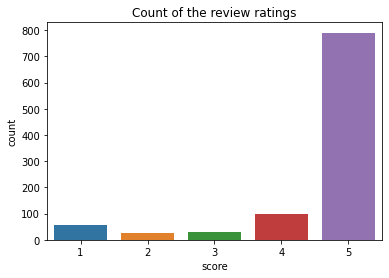

In [ ]:
plot(app17data)

##APP18

In [ ]:
app18data= pd.read_excel('/content/Memrise.xlsx')
app18data_bad_reviews= app18data.loc[app18data.score==1]
printing_topics(app18data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.019*"design" + 0.014*"free" + 0.012*"good" + 0.012*"look" + 0.010*"theme" + 0.010*"like" + 0.009*"great" + 0.009*"option" + 0.009*"memrise" + 0.007*"unusable"


Topic: 1 
Words: 0.014*"subscription" + 0.011*"design" + 0.009*"time" + 0.008*"love" + 0.008*"able" + 0.008*"word" + 0.008*"look" + 0.008*"anymore" + 0.008*"haven" + 0.007*"version"


Topic: 2 
Words: 0.019*"course" + 0.012*"subscription" + 0.012*"word" + 0.012*"lesson" + 0.012*"learning" + 0.010*"duolingo" + 0.010*"audio" + 0.010*"option" + 0.010*"free" + 0.008*"need"


Topic: 3 
Words: 0.022*"course" + 0.017*"learning" + 0.014*"version" + 0.014*"time" + 0.012*"language" + 0.012*"lesson" + 0.011*"progress" + 0.010*"memrise" + 0.010*"year" + 0.009*"great"


Topic: 4 
Words: 0.016*"course" + 0.011*"look" + 0.011*"time" + 0.011*"year" + 0.009*"memrise" + 0.009*"like" + 0.009*"want" + 0.009*"learn" + 0.009*"language" + 0.007*"getting"


Topic: 5 
Words: 0.015*"memrise" + 0.014*"course" + 0.014*"learning" + 0.013

* Topic-1 Good looking Backgroung effects
* Topic-2 Latest version is good with subsscriotion
* Topic-3 Free Audio Option
* Topic-4 Lesson and also memrising well
* Topic-5 Looking like free but requires subscription
*  Topic-6 Subscription issues
* Topic-7 Good content 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


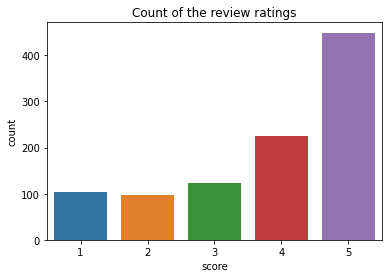

In [ ]:
plot(app18data)

##APP19

In [ ]:
app19data= pd.read_excel('/content/Oda (1).xlsx')
app19data_bad_reviews= app19data.loc[app19data.score==1]
printing_topics(app19data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.024*"class" + 0.018*"refund" + 0.014*"money" + 0.013*"coin" + 0.011*"day" + 0.011*"enrollment" + 0.011*"number" + 0.010*"time" + 0.009*"fraud" + 0.009*"cancel"


Topic: 1 
Words: 0.037*"class" + 0.033*"course" + 0.023*"teacher" + 0.021*"good" + 0.017*"worst" + 0.017*"bridge" + 0.011*"enrolled" + 0.011*"student" + 0.010*"paid" + 0.010*"child"


Topic: 2 
Words: 0.043*"class" + 0.013*"number" + 0.013*"extra" + 0.013*"teacher" + 0.013*"math" + 0.011*"application" + 0.011*"fake" + 0.011*"mark" + 0.011*"install" + 0.011*"science"


Topic: 3 
Words: 0.036*"course" + 0.015*"like" + 0.015*"time" + 0.014*"money" + 0.014*"paid" + 0.013*"worst" + 0.013*"payment" + 0.013*"customer" + 0.012*"class" + 0.009*"bridge"


Topic: 4 
Words: 0.025*"course" + 0.023*"class" + 0.020*"session" + 0.016*"refund" + 0.013*"time" + 0.011*"reply" + 0.011*"given" + 0.011*"team" + 0.009*"enroll" + 0.009*"daughter"


Topic: 5 
Words: 0.021*"class" + 0.019*"mentor" + 0.017*"course" + 0.017*"money" + 0

* Topic-1 Thinking there is some fraud- trust issues
* Topic-2 Bridge course was not so good
* Topic-3 Accepting fake applications
* Topic-4 Wastely paid money fpr the bridge course
* Topic-5 Refund issues
* Topic-6 Worst Experience
* Topic-7 Teaching the same course again again

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


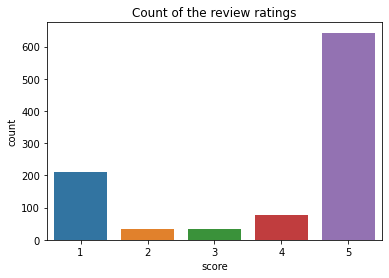

In [ ]:
plot(app19data)

##APP20

In [ ]:
app20data= pd.read_excel('/content/Prodigy.xlsx')
app20data_bad_reviews= app20data.loc[app20data.score==1]
printing_topics(app20data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.016*"account" + 0.012*"poor" + 0.012*"play" + 0.010*"load" + 0.009*"need" + 0.009*"game" + 0.009*"google" + 0.008*"kid" + 0.007*"screen" + 0.007*"great"


Topic: 1 
Words: 0.040*"membership" + 0.031*"like" + 0.025*"game" + 0.020*"thing" + 0.018*"member" + 0.016*"money" + 0.015*"stuff" + 0.011*"say" + 0.011*"math" + 0.009*"pet"


Topic: 2 
Words: 0.081*"game" + 0.018*"math" + 0.017*"prodigy" + 0.015*"thing" + 0.015*"membership" + 0.014*"money" + 0.013*"time" + 0.011*"animal" + 0.011*"phone" + 0.011*"child"


Topic: 3 
Words: 0.028*"time" + 0.020*"math" + 0.020*"game" + 0.014*"grade" + 0.013*"kid" + 0.010*"service" + 0.009*"like" + 0.007*"learning" + 0.007*"need" + 0.007*"horrible"


Topic: 4 
Words: 0.083*"game" + 0.023*"like" + 0.023*"play" + 0.018*"membership" + 0.016*"prodigy" + 0.015*"member" + 0.013*"good" + 0.011*"pet" + 0.010*"monster" + 0.010*"school"


Topic: 5 
Words: 0.057*"game" + 0.050*"membership" + 0.030*"pet" + 0.026*"evolve" + 0.021*"member" + 0.016*"

* Topic-1 Account related issues
* Topic-2 Asking for membership
* Topic-3 Children learning math wit game
* Topic-4 Time related issues
* Topic-5 Nice idea of pet monster
* Topic-6 Membership issue
* Topic-7 Hard work required

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


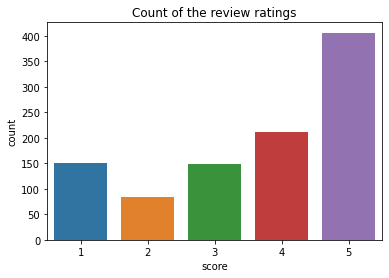

In [ ]:
plot(app20data)

##APP21

In [ ]:
app21data= pd.read_excel('/content/TeachMint.xlsx')
app21data_bad_reviews= app21data.loc[app21data.score==1]
printing_topics(app21data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.037*"class" + 0.037*"problem" + 0.024*"solve" + 0.018*"open" + 0.016*"star" + 0.016*"student" + 0.016*"good" + 0.013*"video" + 0.013*"able" + 0.013*"soon"


Topic: 1 
Words: 0.042*"internet" + 0.033*"connection" + 0.023*"class" + 0.022*"check" + 0.021*"problem" + 0.018*"show" + 0.017*"able" + 0.015*"good" + 0.015*"teachmint" + 0.015*"worst"


Topic: 2 
Words: 0.064*"class" + 0.018*"open" + 0.018*"issue" + 0.018*"connection" + 0.016*"good" + 0.016*"version" + 0.016*"internet" + 0.014*"network" + 0.013*"showing" + 0.012*"experience"


Topic: 3 
Words: 0.043*"class" + 0.030*"test" + 0.022*"question" + 0.015*"good" + 0.014*"notification" + 0.014*"teacher" + 0.013*"worst" + 0.011*"option" + 0.009*"student" + 0.009*"able"


Topic: 4 
Words: 0.024*"screen" + 0.024*"class" + 0.021*"student" + 0.017*"time" + 0.017*"teachmint" + 0.016*"live" + 0.014*"option" + 0.014*"thing" + 0.012*"long" + 0.012*"teacher"


Topic: 5 
Words: 0.041*"class" + 0.020*"teacher" + 0.019*"device" + 0

* Topic-1 Good problem solving along with starring
* Topic-2 Internet connection issues
* Topic-3 Class opening isssue
* Topic-4 No notification option
* Topic-5 Long live classes
* Topic-6 On reviewing start form the beginning
* Topic-7 Recording feature available

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


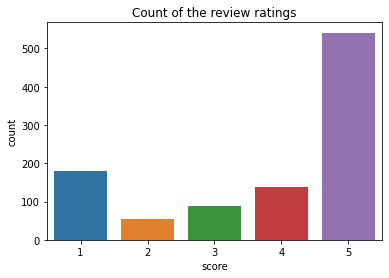

In [ ]:
plot(app21data)

##APP22

In [ ]:
app22data= pd.read_excel('/content/ThirdFlix.xlsx')
app22data_bad_reviews= app22data.loc[app22data.score==1]
printing_topics(app22data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.021*"session" + 0.021*"worst" + 0.018*"browser" + 0.016*"good" + 0.016*"problem" + 0.013*"experience" + 0.013*"working" + 0.013*"practically" + 0.013*"response" + 0.013*"class"


Topic: 1 
Words: 0.025*"worst" + 0.023*"time" + 0.018*"video" + 0.013*"login" + 0.013*"problem" + 0.013*"phone" + 0.011*"error" + 0.011*"class" + 0.010*"experience" + 0.010*"microphone"


Topic: 2 
Words: 0.018*"phone" + 0.018*"video" + 0.018*"download" + 0.018*"data" + 0.014*"good" + 0.014*"like" + 0.011*"tried" + 0.011*"opening" + 0.011*"thing" + 0.011*"able"


Topic: 3 
Words: 0.021*"worst" + 0.018*"meeting" + 0.018*"zoom" + 0.014*"problem" + 0.014*"open" + 0.011*"consumes" + 0.011*"coming" + 0.011*"data" + 0.011*"work" + 0.010*"feature"


Topic: 4 
Words: 0.024*"video" + 0.018*"time" + 0.018*"worst" + 0.017*"class" + 0.014*"work" + 0.012*"star" + 0.011*"problem" + 0.011*"guy" + 0.011*"come" + 0.011*"seen"


Topic: 5 
Words: 0.034*"zoom" + 0.033*"class" + 0.022*"option" + 0.017*"practical

* Topic-1 Good Problem experience
* Topic-2 Login problem
* Topic-3 Vedio downloading taking more data
* Topic-4 Problem with interface
* Topic-5 Vedio timing issues
* Topic-6 Chat issues in zoom
* Topic-7 Time wasting sessions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


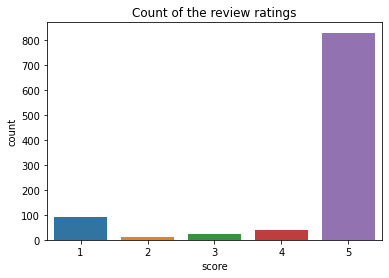

In [ ]:
plot(app22data)

##APP23

In [ ]:
app23data= pd.read_excel('/content/TinyTap.xlsx')
app23data_bad_reviews= app23data.loc[app23data.score==1]
printing_topics(app23data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.033*"trial" + 0.030*"free" + 0.029*"charged" + 0.021*"cancel" + 0.019*"year" + 0.018*"subscription" + 0.018*"game" + 0.016*"want" + 0.015*"refund" + 0.015*"work"


Topic: 1 
Words: 0.024*"subscription" + 0.022*"charged" + 0.018*"cancelled" + 0.017*"refund" + 0.017*"email" + 0.014*"money" + 0.013*"child" + 0.010*"download" + 0.010*"year" + 0.009*"game"


Topic: 2 
Words: 0.025*"subscription" + 0.024*"cancel" + 0.021*"charged" + 0.020*"email" + 0.015*"trial" + 0.014*"money" + 0.013*"refund" + 0.012*"phone" + 0.010*"account" + 0.010*"work"


Topic: 3 
Words: 0.034*"game" + 0.030*"money" + 0.020*"good" + 0.015*"year" + 0.014*"freeze" + 0.013*"free" + 0.012*"refund" + 0.012*"child" + 0.011*"tried" + 0.011*"worth"


Topic: 4 
Words: 0.023*"time" + 0.020*"game" + 0.014*"day" + 0.014*"answer" + 0.012*"charge" + 0.010*"sign" + 0.010*"year" + 0.009*"subscription" + 0.009*"child" + 0.009*"stuck"


Topic: 5 
Words: 0.036*"refund" + 0.022*"money" + 0.019*"subscription" + 0.018*"t

* Topic-1 Refund related issues
* Topic-2 Subscription related issue
* Topic-3 Account subscription cancelles
* Toipic-4 Freezing game
*  Topic-5 Time taking game]
* Topic-6 Card payment related issues
* Topic-7 Sending emails for subscription

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


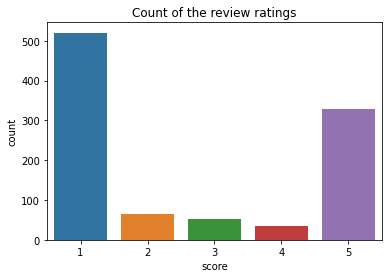

In [ ]:
plot(app23data)

##APP24

In [ ]:
app24data= pd.read_excel('/content/Toppr (1).xlsx')
app24data_bad_reviews= app24data.loc[app24data.score==1]
printing_topics(app24data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.034*"video" + 0.025*"doubt" + 0.024*"money" + 0.020*"question" + 0.014*"waste" + 0.013*"teacher" + 0.013*"better" + 0.012*"time" + 0.011*"premium" + 0.011*"answer"


Topic: 1 
Words: 0.017*"subscription" + 0.014*"doubt" + 0.013*"time" + 0.012*"answer" + 0.012*"tutor" + 0.011*"solve" + 0.011*"worst" + 0.011*"money" + 0.010*"good" + 0.009*"issue"


Topic: 2 
Words: 0.027*"worst" + 0.023*"problem" + 0.022*"video" + 0.017*"time" + 0.012*"know" + 0.012*"question" + 0.011*"toppr" + 0.011*"want" + 0.009*"need" + 0.008*"solve"


Topic: 3 
Words: 0.018*"time" + 0.017*"problem" + 0.014*"subscription" + 0.012*"class" + 0.012*"video" + 0.012*"toppr" + 0.011*"show" + 0.011*"worst" + 0.011*"live" + 0.010*"chapter"


Topic: 4 
Words: 0.017*"good" + 0.017*"video" + 0.017*"toppr" + 0.016*"worst" + 0.012*"class" + 0.010*"free" + 0.010*"like" + 0.008*"question" + 0.008*"year" + 0.008*"issue"


Topic: 5 
Words: 0.032*"time" + 0.018*"toppr" + 0.014*"speed" + 0.011*"experience" + 0.010*"s

* Topic-1  Money payment required fror doubt answer
* Topic-2 Paymnet issue
* Topic-3 No video solution available
* Topic-4,5,6,7 Good reviews

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


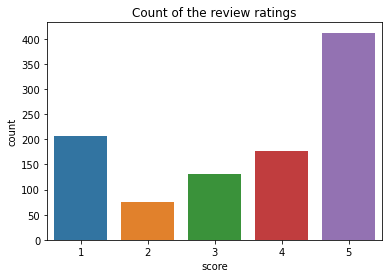

In [ ]:
plot(app24data)

##APP25

In [ ]:
app25data= pd.read_excel('/content/Udemy (1).xlsx')
app25data_bad_reviews= app25data.loc[app25data.score==1]
printing_topics(app25data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.022*"course" + 0.018*"video" + 0.017*"udemy" + 0.015*"password" + 0.014*"working" + 0.014*"support" + 0.014*"casting" + 0.011*"time" + 0.010*"work" + 0.009*"update"


Topic: 1 
Words: 0.080*"course" + 0.030*"account" + 0.018*"payment" + 0.018*"purchased" + 0.018*"able" + 0.017*"udemy" + 0.016*"issue" + 0.014*"time" + 0.012*"worst" + 0.011*"login"


Topic: 2 
Words: 0.053*"video" + 0.037*"course" + 0.023*"play" + 0.016*"work" + 0.014*"downloaded" + 0.011*"lecture" + 0.011*"offline" + 0.010*"want" + 0.009*"udemy" + 0.009*"watch"


Topic: 3 
Words: 0.037*"course" + 0.030*"video" + 0.014*"udemy" + 0.012*"issue" + 0.011*"play" + 0.010*"view" + 0.009*"update" + 0.009*"time" + 0.009*"downloaded" + 0.009*"ticket"


Topic: 4 
Words: 0.011*"video" + 0.011*"response" + 0.009*"watch" + 0.009*"time" + 0.008*"device" + 0.008*"udemy" + 0.007*"thing" + 0.007*"feature" + 0.007*"load" + 0.006*"able"


Topic: 5 
Words: 0.018*"course" + 0.015*"video" + 0.012*"time" + 0.012*"content" + 0

* Topic-1  Time to time work update
* Topic-2 Login issues
* Topic-3 Wanted offline video downloading option
* Topic-4 Video playing issues
* Topic-5 Working time issue
* Topic-6 Payment related issues
* Topic-7 Working time issue

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


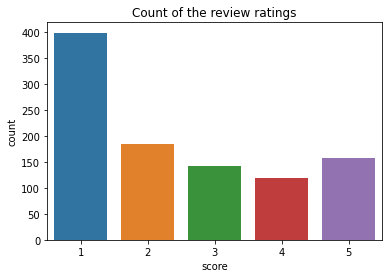

In [ ]:
plot(app25data)

##APP26

In [ ]:
app26data= pd.read_excel('/content/Unacademy (1).xlsx')
app26data_bad_reviews= app26data.loc[app24data.score==1]
printing_topics(app26data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.025*"unacademy" + 0.018*"good" + 0.014*"course" + 0.014*"update" + 0.013*"live" + 0.013*"class" + 0.012*"student" + 0.012*"team" + 0.009*"free" + 0.008*"subscription"


Topic: 1 
Words: 0.025*"class" + 0.019*"working" + 0.017*"test" + 0.016*"update" + 0.015*"issue" + 0.013*"open" + 0.012*"good" + 0.011*"course" + 0.011*"worst" + 0.011*"facing"


Topic: 2 
Words: 0.031*"teacher" + 0.025*"unacademy" + 0.024*"platform" + 0.018*"subscription" + 0.014*"subscribe" + 0.012*"student" + 0.012*"plus" + 0.011*"best" + 0.010*"worst" + 0.010*"provide"


Topic: 3 
Words: 0.024*"course" + 0.019*"teacher" + 0.018*"class" + 0.015*"subscription" + 0.014*"good" + 0.012*"unacademy" + 0.012*"study" + 0.011*"time" + 0.010*"best" + 0.010*"device"


Topic: 4 
Words: 0.027*"good" + 0.022*"educator" + 0.020*"class" + 0.018*"unacademy" + 0.016*"learning" + 0.016*"issue" + 0.015*"note" + 0.011*"time" + 0.011*"doubt" + 0.010*"star"


Topic: 5 
Words: 0.036*"unacademy" + 0.018*"feature" + 0.018*"

* Topic-1  Good Course, Live free class along with interaction
* Topic-2 Test Update issue
* Topic-3,4,5 ,6,7 Positive Reviews

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


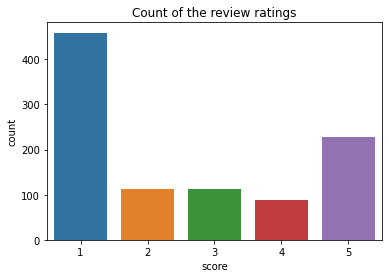

In [ ]:
plot(app26data)

##APP27

In [ ]:
app27data= pd.read_excel('/content/Vedantu.xlsx')
app27data_bad_reviews= app27data.loc[app27data.score==1]
printing_topics(app27data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.029*"class" + 0.019*"good" + 0.018*"doubt" + 0.016*"vedantu" + 0.015*"time" + 0.012*"problem" + 0.011*"live" + 0.010*"video" + 0.010*"experience" + 0.010*"minute"


Topic: 1 
Words: 0.024*"time" + 0.023*"issue" + 0.022*"teacher" + 0.020*"good" + 0.018*"worst" + 0.016*"open" + 0.013*"class" + 0.012*"vedantu" + 0.011*"problem" + 0.010*"learning"


Topic: 2 
Words: 0.036*"vedantu" + 0.023*"refund" + 0.018*"class" + 0.016*"study" + 0.012*"want" + 0.012*"good" + 0.011*"course" + 0.010*"note" + 0.010*"problem" + 0.010*"live"


Topic: 3 
Words: 0.046*"class" + 0.022*"vedantu" + 0.019*"teacher" + 0.016*"time" + 0.012*"like" + 0.012*"live" + 0.012*"experience" + 0.011*"good" + 0.011*"worst" + 0.010*"option"


Topic: 4 
Words: 0.021*"time" + 0.013*"worst" + 0.011*"free" + 0.011*"vedantu" + 0.010*"class" + 0.010*"application" + 0.010*"number" + 0.010*"content" + 0.009*"like" + 0.009*"issue"


Topic: 5 
Words: 0.022*"worst" + 0.020*"problem" + 0.014*"class" + 0.012*"good" + 0.01

* Topic-1 Good live experience
* Topic-2 Good App but time issues
* Topic-3,4 Positive
* Topic-5 Content Isuue
* Topic-6 Good class
* Topic-7 Messeging issue to the teacher

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


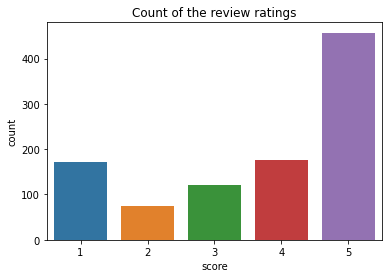

In [ ]:
plot(app27data)

##APP28

In [ ]:
app28data= pd.read_excel('/content/ePathshala (1).xlsx')
app28data_bad_reviews= app28data.loc[app28data.score==1]
printing_topics(app28data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.023*"page" + 0.022*"developer" + 0.018*"symbol" + 0.018*"feature" + 0.014*"video" + 0.014*"class" + 0.010*"downloading" + 0.009*"device" + 0.009*"installed" + 0.009*"hope"


Topic: 1 
Words: 0.024*"time" + 0.023*"mode" + 0.020*"update" + 0.019*"download" + 0.018*"downloading" + 0.017*"book" + 0.015*"chapter" + 0.015*"internet" + 0.015*"application" + 0.013*"worst"


Topic: 2 
Words: 0.059*"book" + 0.042*"downloading" + 0.025*"available" + 0.024*"time" + 0.024*"working" + 0.017*"audio" + 0.017*"video" + 0.016*"worst" + 0.015*"opening" + 0.015*"section"


Topic: 3 
Words: 0.029*"download" + 0.029*"time" + 0.025*"problem" + 0.021*"properly" + 0.018*"ebook" + 0.017*"work" + 0.014*"downloading" + 0.014*"downloaded" + 0.013*"content" + 0.012*"know"


Topic: 4 
Words: 0.027*"good" + 0.019*"book" + 0.016*"brightness" + 0.015*"download" + 0.015*"went" + 0.015*"wrong" + 0.013*"open" + 0.012*"work" + 0.012*"thing" + 0.011*"device"


Topic: 5 
Words: 0.100*"book" + 0.071*"downlo

* Topic-1  Positive 
* Topic-2 Internet issues
* Topic-3 Book downloading available 
* Topic-4 Time issues
* Topic-5 ,6,7 Positive reviews

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


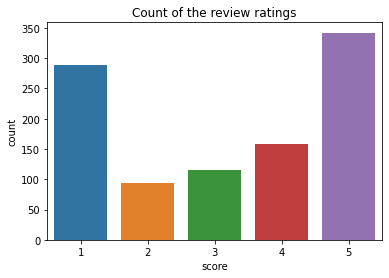

In [ ]:
plot(app28data)

##APP29

In [ ]:
app29data= pd.read_excel('/content/edX.xlsx')
app29data_bad_reviews= app29data.loc[app29data.score==1]
printing_topics(app29data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.043*"course" + 0.017*"search" + 0.013*"work" + 0.013*"problem" + 0.012*"downloaded" + 0.011*"unable" + 0.011*"show" + 0.009*"sign" + 0.009*"phone" + 0.009*"browser"


Topic: 1 
Words: 0.023*"course" + 0.015*"mobile" + 0.013*"issue" + 0.010*"exam" + 0.009*"difficult" + 0.008*"data" + 0.008*"text" + 0.008*"support" + 0.008*"money" + 0.008*"user"


Topic: 2 
Words: 0.033*"course" + 0.025*"video" + 0.019*"screen" + 0.016*"page" + 0.016*"time" + 0.014*"account" + 0.012*"access" + 0.009*"download" + 0.009*"keep" + 0.009*"crashing"


Topic: 3 
Words: 0.042*"course" + 0.019*"page" + 0.015*"error" + 0.014*"load" + 0.013*"browser" + 0.010*"mobile" + 0.010*"time" + 0.010*"video" + 0.008*"crash" + 0.008*"data"


Topic: 4 
Words: 0.045*"course" + 0.030*"video" + 0.017*"time" + 0.016*"load" + 0.011*"screen" + 0.010*"downloaded" + 0.009*"tried" + 0.008*"account" + 0.008*"watch" + 0.008*"register"


Topic: 5 
Words: 0.036*"video" + 0.020*"course" + 0.016*"work" + 0.012*"option" + 0.

* Topic-1 Browser unable to download
* Topic-2 Diffriculty in exam 
* Topic-3 Crashing 
* Topic-4 Error in loading the course page
* Topic-5 Registration issues
* Topic-6 Good Experience
* Topic-7 Crashing device while watching video

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


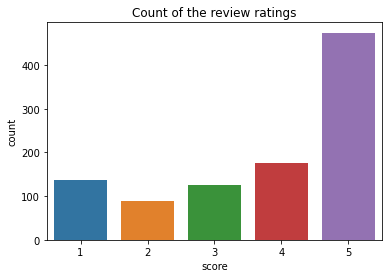

In [ ]:
plot(app29data)

##APP30

In [ ]:
app30data= pd.read_excel('/content/uLesson (1).xlsx')
app30data_bad_reviews= app30data.loc[app30data.score==1]
printing_topics(app30data_bad_reviews)
print("\n")

Topic: 0 
Words: 0.026*"number" + 0.016*"code" + 0.015*"connection" + 0.015*"open" + 0.013*"phone" + 0.013*"downloading" + 0.011*"subscription" + 0.011*"good" + 0.011*"subject" + 0.010*"lesson"


Topic: 1 
Words: 0.020*"phone" + 0.020*"working" + 0.014*"country" + 0.014*"opened" + 0.014*"keep" + 0.014*"open" + 0.012*"number" + 0.012*"downloaded" + 0.012*"update" + 0.012*"annoying"


Topic: 2 
Words: 0.019*"time" + 0.014*"video" + 0.014*"lesson" + 0.012*"waste" + 0.012*"subject" + 0.011*"help" + 0.010*"recommend" + 0.010*"payment" + 0.009*"thanks" + 0.009*"phone"


Topic: 3 
Words: 0.022*"country" + 0.022*"code" + 0.019*"open" + 0.019*"want" + 0.019*"guy" + 0.018*"data" + 0.017*"primary" + 0.015*"like" + 0.014*"need" + 0.012*"downloaded"


Topic: 4 
Words: 0.025*"student" + 0.025*"subject" + 0.018*"like" + 0.018*"saying" + 0.017*"science" + 0.016*"work" + 0.012*"help" + 0.011*"commercial" + 0.011*"people" + 0.011*"data"


Topic: 5 
Words: 0.013*"lesson" + 0.012*"star" + 0.010*"loading" 

* Topic-1 : Opening, downloading and subscription issues 
* Topic-2 : Not working properly , update issues
* Topic-3: Time delay issues
* Topic-4: Posiitve reviews
* Topic-5: Good reviews
* Topic-6: Loading issues, time delay and download issues
* Topic-7: Working and update issues mostly regarding data and time

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


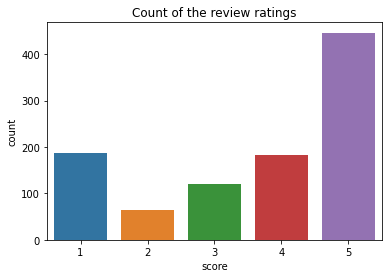

In [ ]:
plot(app30data)